In [20]:
import pandas

data = pandas.read_csv("s3://rmit-ml-team/jupyter-test/fer2013.csv")

In [21]:
data.head()


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [22]:
print('Samples distribution across Usage:')
print(data.Usage.value_counts())

Samples distribution across Usage:
Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64


In [23]:
print('Samples per emotion:')
print(data.emotion.value_counts())

Samples per emotion:
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64


In [24]:
print('Number of pixels for a sample:')
print(len(data.pixels[0].split(' ')))

Number of pixels for a sample:
2304


In [25]:
train_set = data[(data.Usage == 'Training')]
validation_set = data[(data.Usage == 'PublicTest')]
test_set = data[(data.Usage == 'PrivateTest')]

In [26]:
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
num_classes = len(emotion_labels)

In [27]:
from math import sqrt

depth = 1
height = int(sqrt(len(data.pixels[0].split())))
width = height

/home/ec2-user/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.


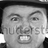

Angry


In [28]:
#@title Choose a sample to visualize
sample_number = 76 #@param {type:"slider", min:0, max:1000, step:1}

import numpy as np
import scipy.misc
from IPython.display import display

array = np.mat(data.pixels[sample_number]).reshape(48,48)
image = scipy.misc.toimage(array)
display(image)
print(emotion_labels[data.emotion[sample_number]])

In [29]:
X_train = np.array(map(str.split, train_set.pixels), np.float32)
X_validation = np.array(map(str.split, validation_set.pixels), np.float32)
X_test = np.array(map(str.split, test_set.pixels), np.float32)

num_train = X_train.shape[0]
num_validation = X_validation.shape[0]
num_test = X_test.shape[0]

X_train = X_train.reshape(num_train, width, height, depth)
X_validation = X_validation.reshape(num_test, width, height, depth)
X_test = X_test.reshape(num_test, width, height, depth)

print('Training: ',X_train.shape)
print('Validation: ',X_validation.shape)
print('Test: ',X_test.shape)

from keras.utils import np_utils

y_train = train_set.emotion
y_train = np_utils.to_categorical(y_train, num_classes)

y_validation = validation_set.emotion
y_validation = np_utils.to_categorical(y_validation, num_classes)

y_test = test_set.emotion
y_test = np_utils.to_categorical(y_test, num_classes)

print('Training: ',y_train.shape)
print('Validation: ',y_validation.shape)
print('Test: ',y_test.shape)

('Training: ', (28709, 48, 48, 1))
('Validation: ', (3589, 48, 48, 1))
('Test: ', (3589, 48, 48, 1))
('Training: ', (28709, 7))
('Validation: ', (3589, 7))
('Test: ', (3589, 7))


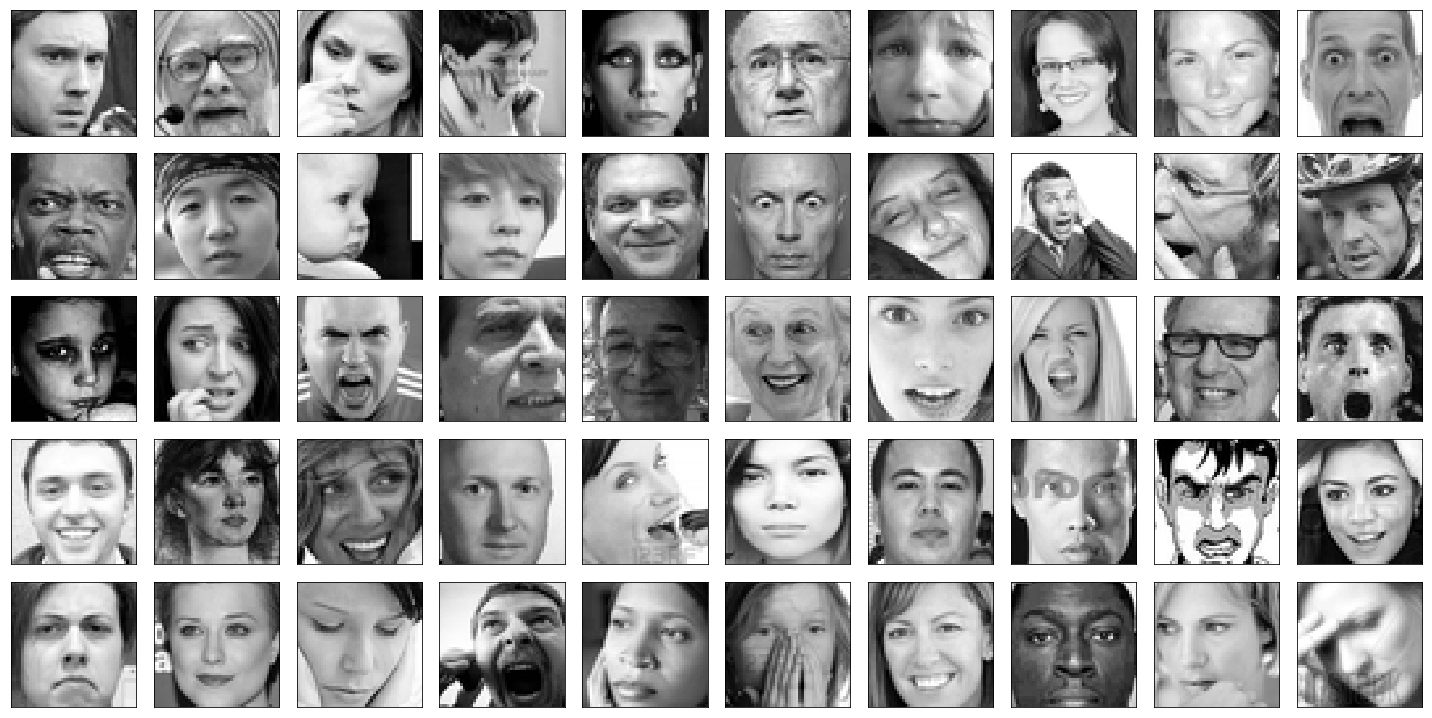

In [30]:
import matplotlib
import matplotlib.pyplot as plt

def overview(start, end, X):
    fig = plt.figure(figsize=(20,20))
    for i in range(start, end):
        input_img = X[i:(i+1),:,:,:]
        ax = fig.add_subplot(10,10,i+1)
        ax.imshow(input_img[0,:,:,0], cmap=matplotlib.cm.gray)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.tight_layout()
    plt.show()
overview(0,50, X_train)

In [31]:
from tensorflow.keras.layers import Convolution2D, Activation, BatchNormalization, MaxPooling2D, Dropout, Dense, Flatten, AveragePooling2D
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(Convolution2D(64, (3, 1), padding='same', input_shape=(48,48,1)))
model.add(Convolution2D(64, (1, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Convolution2D(128, (3, 1), padding='same'))
model.add(Convolution2D(128, (1, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Convolution2D(256, (3, 1), padding='same'))
model.add(Convolution2D(256, (1, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Convolution2D(512, (3, 1), padding='same'))
model.add(Convolution2D(512, (1, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7))
model.add(Activation('softmax'))

In [32]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 48, 48, 64)        12352     
_________________________________________________________________
batch_normalization_12 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
activation_14 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 128)      

In [33]:
from keras.preprocessing.image import ImageDataGenerator 

datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.0,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.0,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,   # randomly flip images
    )


datagen.fit(X_train)
datagen.fit(X_validation)

In [34]:
batch_size = 32

num_epochs = 25

In [39]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

filepath='Model.{epoch:02d}-{val_acc:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')

from keras import backend as K

def fbeta(y_true, y_pred, threshold_shift=0):
    beta = 1

    # just in case of hipster activation at the final layer
    y_pred = K.clip(y_pred, 0, 1)

    # shifting the prediction threshold from .5 if needed
    y_pred_bin = K.round(y_pred + threshold_shift)

    tp = K.sum(K.round(y_true * y_pred_bin), axis=1) + K.epsilon()
    fp = K.sum(K.round(K.clip(y_pred_bin - y_true, 0, 1)), axis=1)
    fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)), axis=1)

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    beta_squared = beta ** 2
    return K.mean((beta_squared + 1) * (precision * recall) / (beta_squared * precision + recall + K.epsilon()))

In [40]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=[fbeta, 'acc'])

In [41]:
train_flow = datagen.flow(X_train, y_train, batch_size=batch_size)
validation_flow = datagen.flow(X_validation, y_validation)

In [42]:
%%time
history = model.fit_generator(train_flow,
                    steps_per_epoch=len(X_train) / batch_size,
                    epochs=num_epochs, 
                    verbose=1, 
                    validation_data=validation_flow, 
                    validation_steps=len(X_validation) / batch_size,
                    callbacks=[checkpointer, reduce_lr, checkpointer])

Epoch 1/25
112/897 [==>...........................] - ETA: 2:28 - loss: 1.6377 - fbeta: 0.2472 - acc: 0.3965
Epoch 00001: saving model to Model.01-0.3965.hdf5

Epoch 00001: saving model to Model.01-0.3965.hdf5
897/897 [==============================] - 533s 594ms/step - loss: 1.7034 - fbeta: 0.1293 - acc: 0.3381 - val_loss: 1.6377 - val_fbeta: 0.2472 - val_acc: 0.3965
Epoch 2/25
112/897 [==>...........................] - ETA: 2:16 - loss: 1.3155 - fbeta: 0.2129 - acc: 0.4858
Epoch 00002: saving model to Model.02-0.4858.hdf5

Epoch 00002: saving model to Model.02-0.4858.hdf5
897/897 [==============================] - 513s 572ms/step - loss: 1.3820 - fbeta: 0.2484 - acc: 0.4687 - val_loss: 1.3155 - val_fbeta: 0.2129 - val_acc: 0.4858
Epoch 3/25
112/897 [==>...........................] - ETA: 2:17 - loss: 1.3564 - fbeta: 0.3641 - acc: 0.5042
Epoch 00003: saving model to Model.03-0.5042.hdf5

Epoch 00003: saving model to Model.03-0.5042.hdf5
897/897 [==============================] - 521s 

In [43]:
score = model.evaluate(X_test, y_test, steps=len(X_test) / batch_size)
print('Evaluation loss: ', score[0])
print('Evaluation accuracy: ', score[1])

112/112 [==============================] - 1875s 17s/step - loss: 0.9993 - fbeta: 0.5606 - acc: 0.6414
('Evaluation loss: ', 0.99931401014328)
('Evaluation accuracy: ', 0.5606012)
